# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data=pd.read_excel("Base_Problem_Dataset.xlsb")

In [3]:
data.describe()

,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Rating_Origin_1,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [5]:
data.dtypes

ID                                              int64
Patron_Salary                                  object
Automobile_Possession                         float64
Two-Wheeler_Ownership                         float64
Ongoing_Borrowing                             float64
Residence_Proprietorship                      float64
Offspring_Number                              float64
Loan_Capital                                   object
Borrowing_Periodic_Payment                     object
Customer_Revenue_Category                      object
Patron_Academic_Qualification                  object
Customer_Conjugal_State                        object
Patron_Sex                                     object
Borrowing_Agreement_Category                   object
Customer_Living_Arrangement                    object
Population_Fraction_by_Region                  object
Elderliness_in_Days                            object
Work_Duration_in_Days                          object
Enlistment_Period_in_Days   

In [6]:
(data.isnull().sum()/len(data)).sort_values(ascending = False)

Private_Dwelling_Duration                     0.657292
Rating_Origin_1                               0.564888
Community_Non-Payment_Incidence               0.508206
Customer_Vocation                             0.340032
Rating_Origin_3                               0.220925
Solvency_Information_Agency                   0.152147
Identity_Age_in_Days                          0.048976
Rating_Origin_2                               0.046662
Population_Fraction_by_Region                 0.039859
Borrowing_Periodic_Payment                    0.039489
Customer_Revenue_Category                     0.030372
Customer_Living_Arrangement                   0.030257
Telecommunication_Switch                      0.030068
Request_Submission_Hour                       0.030060
Residence_Proprietorship                      0.030044
Borrowing_Agreement_Category                  0.029962
Work_Duration_in_Days                         0.029945
Patron_Academic_Qualification                 0.029912
Offspring_

In [7]:
data = data.drop(['Private_Dwelling_Duration', 'Rating_Origin_1', 'Community_Non-Payment_Incidence', 'Customer_Vocation', 'Rating_Origin_3'], axis = 1)

In [10]:
data['Patron_Salary'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Patron_Salary'].replace(to_replace='$', value= None, regex=True, inplace=True)
data['Loan_Capital'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Loan_Capital'].replace(to_replace='$', value= None, regex=True, inplace=True)
data['Borrowing_Periodic_Payment'].replace(to_replace='$', value= None, regex=True, inplace=True)
data['Population_Fraction_by_Region'].replace(to_replace='@', value= None, regex=True, inplace=True)
data['Elderliness_in_Days'].replace(to_replace='x', value= None, regex=True, inplace=True)
data['Work_Duration_in_Days'].replace(to_replace='x', value= None, regex=True, inplace=True)
data['Enlistment_Period_in_Days'].replace(to_replace='x', value= None, regex=True, inplace=True)
data['Identity_Age_in_Days'].replace(to_replace='x', value= None, regex=True, inplace=True)
data['Patron_Kin_Count'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Customer_Urban_Area_Ranking'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Request_Submission_Day'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Request_Submission_Hour'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Rating_Origin_2'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Telecommunication_Switch'].replace(to_replace='#', value= None, regex=True, inplace=True)
data['Solvency_Information_Agency'].replace(to_replace='#', value= None, regex=True, inplace=True)

In [11]:
data['Automobile_Possession']=data['Automobile_Possession'].fillna(data['Automobile_Possession'].mode()[0])
data['Offspring_Number']=data['Offspring_Number'].fillna(data['Offspring_Number'].mode()[0])
data['Customer_Conjugal_State']=data['Customer_Conjugal_State'].fillna(data['Customer_Conjugal_State'].mode()[0])
data['Sort_of_Institution']=data['Sort_of_Institution'].fillna(data['Sort_of_Institution'].mode()[0])
data['Patron_Academic_Qualification']=data['Patron_Academic_Qualification'].fillna(data['Patron_Academic_Qualification'].mode()[0])
data['Customer_Living_Arrangement']=data['Customer_Living_Arrangement'].fillna(data['Customer_Living_Arrangement'].mode()[0])
data['Customer_Revenue_Category']=data['Customer_Revenue_Category'].fillna(data['Customer_Revenue_Category'].mode()[0])
data['Two-Wheeler_Ownership']=data['Two-Wheeler_Ownership'].fillna(data['Two-Wheeler_Ownership'].mode()[0])
data['Ongoing_Borrowing']=data['Ongoing_Borrowing'].fillna(data['Ongoing_Borrowing'].mode()[0])
data['Residence_Proprietorship']=data['Residence_Proprietorship'].fillna(data['Residence_Proprietorship'].mode()[0])
data['Patron_Sex']=data['Patron_Sex'].fillna(data['Patron_Sex'].mode()[0])
data['Borrowing_Agreement_Category']=data['Borrowing_Agreement_Category'].fillna(data['Borrowing_Agreement_Category'].mode()[0])
data['Patron_Constant_Correspondence_Marker']=data['Patron_Constant_Correspondence_Marker'].fillna(data['Patron_Constant_Correspondence_Marker'].mode()[0])
data['Customer_Professional_Communication_Marker']=data['Customer_Professional_Communication_Marker'].fillna(data['Customer_Professional_Communication_Marker'].mode()[0])
data['Patron_Salary']=data['Patron_Salary'].fillna(data['Patron_Salary'].median())
data['Loan_Capital']=data['Loan_Capital'].fillna(data['Loan_Capital'].median())
data['Borrowing_Periodic_Payment']=data['Borrowing_Periodic_Payment'].fillna(data['Borrowing_Periodic_Payment'].median())
data['Population_Fraction_by_Region']=data['Population_Fraction_by_Region'].fillna(data['Population_Fraction_by_Region'].median())
data['Elderliness_in_Days']=data['Elderliness_in_Days'].fillna(data['Elderliness_in_Days'].median())
data['Work_Duration_in_Days']=data['Work_Duration_in_Days'].fillna(data['Work_Duration_in_Days'].median())
data['Enlistment_Period_in_Days']=data['Enlistment_Period_in_Days'].fillna(data['Enlistment_Period_in_Days'].median())
data['Identity_Age_in_Days']=data['Identity_Age_in_Days'].fillna(data['Identity_Age_in_Days'].median())
data['Patron_Kin_Count']=data['Patron_Kin_Count'].fillna(data['Patron_Kin_Count'].median())
data['Customer_Urban_Area_Ranking']=data['Customer_Urban_Area_Ranking'].fillna(data['Customer_Urban_Area_Ranking'].median())
data['Request_Submission_Day']=data['Request_Submission_Day'].fillna(data['Request_Submission_Day'].median())
data['Request_Submission_Hour']=data['Request_Submission_Hour'].fillna(data['Request_Submission_Hour'].median())
data['Rating_Origin_2']=data['Rating_Origin_2'].fillna(data['Rating_Origin_2'].median())
data['Telecommunication_Switch']=data['Telecommunication_Switch'].fillna(data['Telecommunication_Switch'].median())
data['Solvency_Information_Agency']=data['Solvency_Information_Agency'].fillna(data['Solvency_Information_Agency'].median())




In [12]:
(data.isnull().sum()/len(data)).sort_values(ascending = False)

ID                                            0.0
Request_Submission_Day                        0.0
Identity_Age_in_Days                          0.0
Cellphone_Marker                              0.0
Residential_Phone_Marker                      0.0
Employment_Phone_Operation                    0.0
Patron_Kin_Count                              0.0
Customer_Urban_Area_Ranking                   0.0
Request_Submission_Hour                       0.0
Patron_Salary                                 0.0
Patron_Constant_Correspondence_Marker         0.0
Customer_Professional_Communication_Marker    0.0
Sort_of_Institution                           0.0
Rating_Origin_2                               0.0
Telecommunication_Switch                      0.0
Solvency_Information_Agency                   0.0
Enlistment_Period_in_Days                     0.0
Work_Duration_in_Days                         0.0
Elderliness_in_Days                           0.0
Population_Fraction_by_Region                 0.0


# Data Analysis

C:\Users\admin\AppData\Local\Temp\ipykernel_8768\566488821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().round(2)


<Axes: >

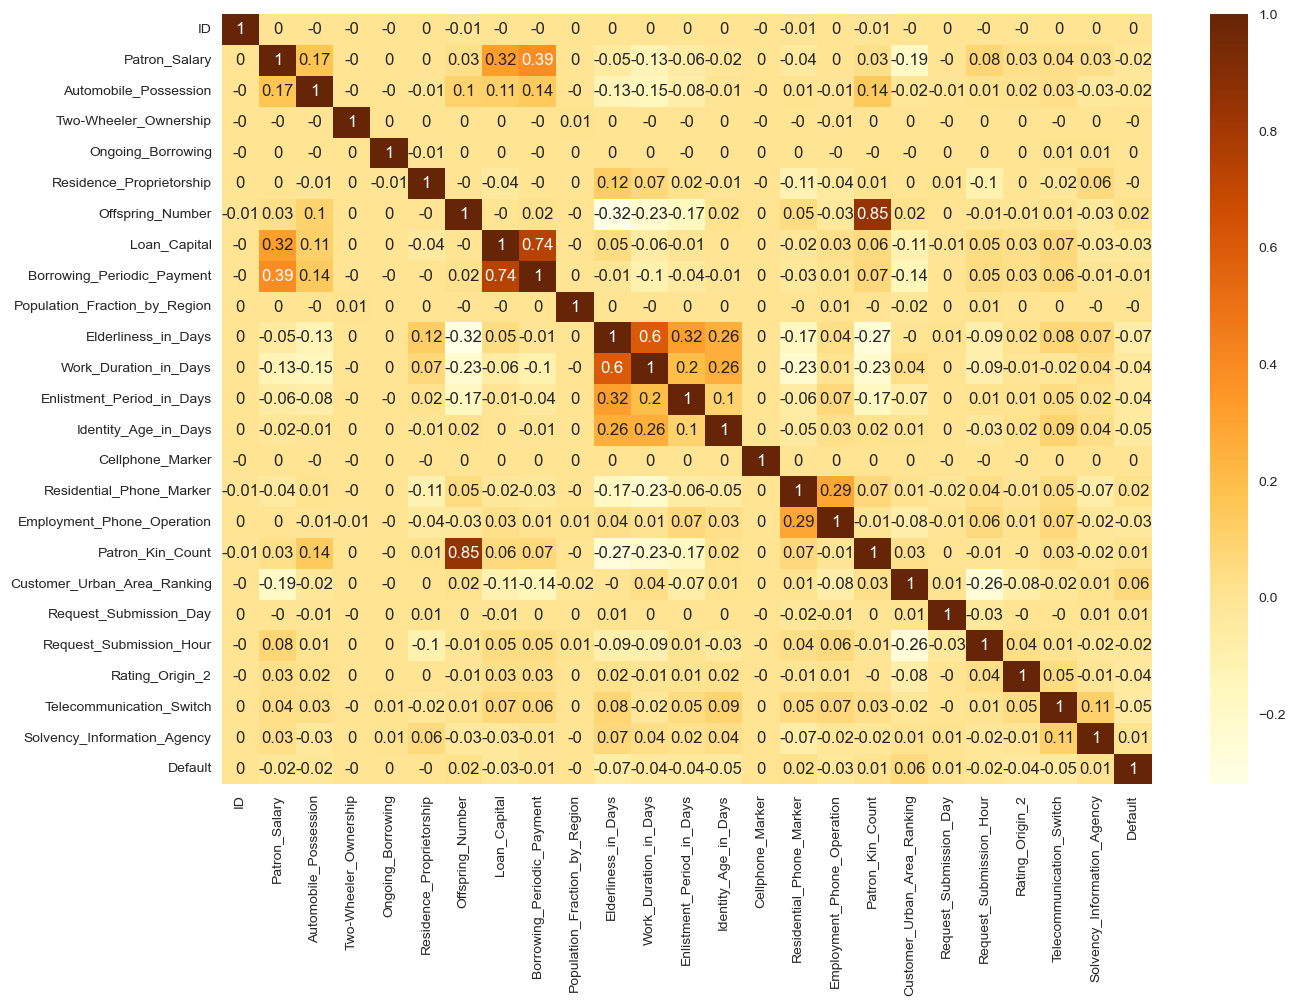

In [13]:
corr = data.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [14]:
data['Patron_Salary'] = data['Patron_Salary'].astype('float')
data['Loan_Capital'] = data['Loan_Capital'].astype('float')
data['Borrowing_Periodic_Payment'] = data['Borrowing_Periodic_Payment'].astype('float')
data['Population_Fraction_by_Region'] = data['Population_Fraction_by_Region'].astype('float')
data['Elderliness_in_Days'] = data['Elderliness_in_Days'].astype('float')
data['Work_Duration_in_Days'] = data['Work_Duration_in_Days'].astype('float')
data['Enlistment_Period_in_Days'] = data['Enlistment_Period_in_Days'].astype('float')
data['Identity_Age_in_Days'] = data['Identity_Age_in_Days'].astype('float')



<Axes: title={'center': 'Patron Salary'}, xlabel='Patron_Salary'>

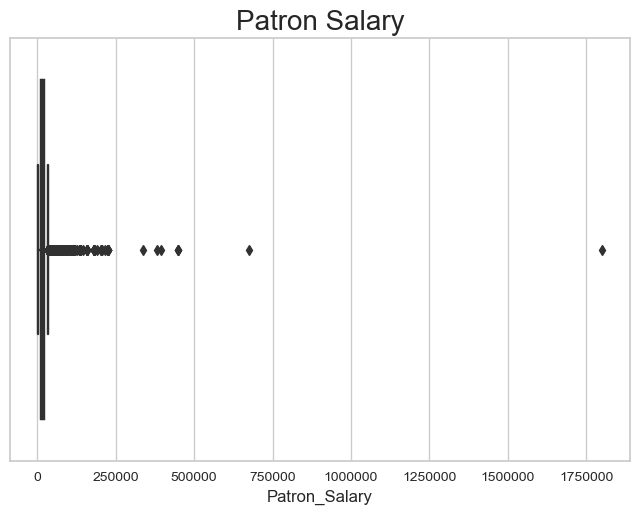

In [15]:
plt.title("Patron Salary", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Patron_Salary"])

In [16]:
data = data[data['Patron_Salary'] < 200000]

<Axes: title={'center': 'Patron Salary Without Outlier'}, xlabel='Patron_Salary'>

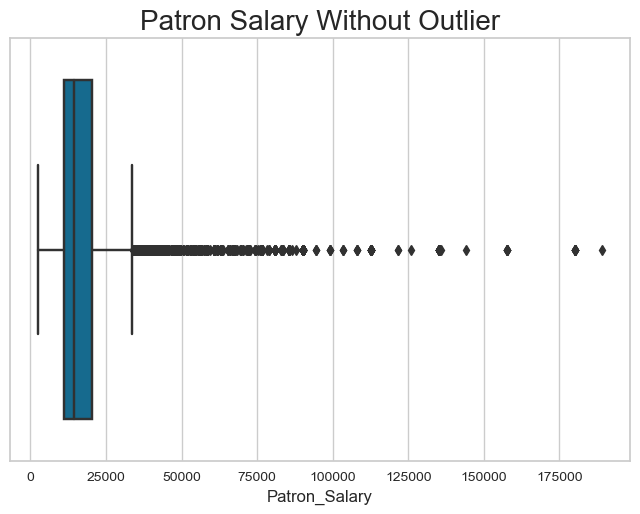

In [17]:
plt.title("Patron Salary Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Patron_Salary"])

<Axes: title={'center': 'Boxplot Loan_Capital'}, xlabel='Loan_Capital'>

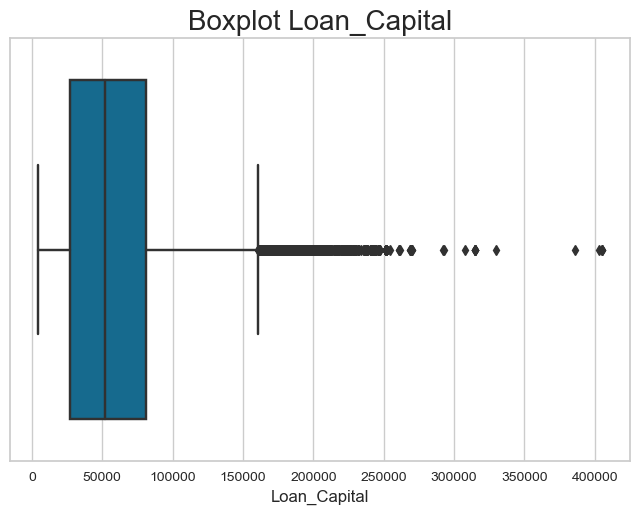

In [18]:
plt.title("Boxplot Loan_Capital", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Loan_Capital"])

<Axes: title={'center': 'Boxplot Population_Region_Relative'}, xlabel='Population_Fraction_by_Region'>

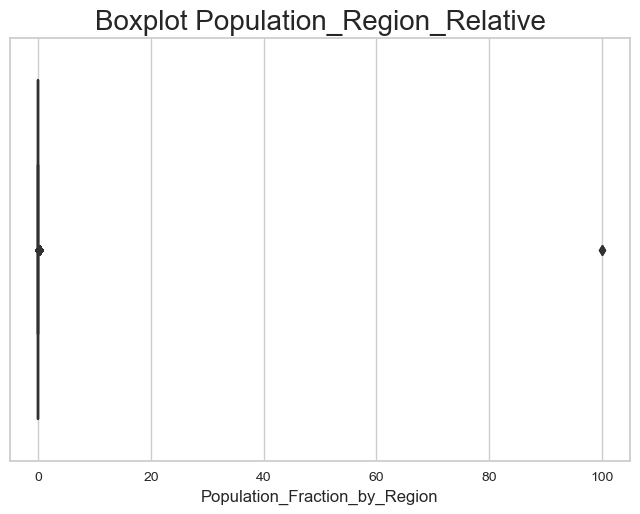

In [19]:
plt.title("Boxplot Population_Region_Relative", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Population_Fraction_by_Region"])

In [20]:
data = data[data['Population_Fraction_by_Region'] < 20]

<Axes: title={'center': 'Boxplot Population_Fraction_by_Region Without Outlier'}, xlabel='Population_Fraction_by_Region'>

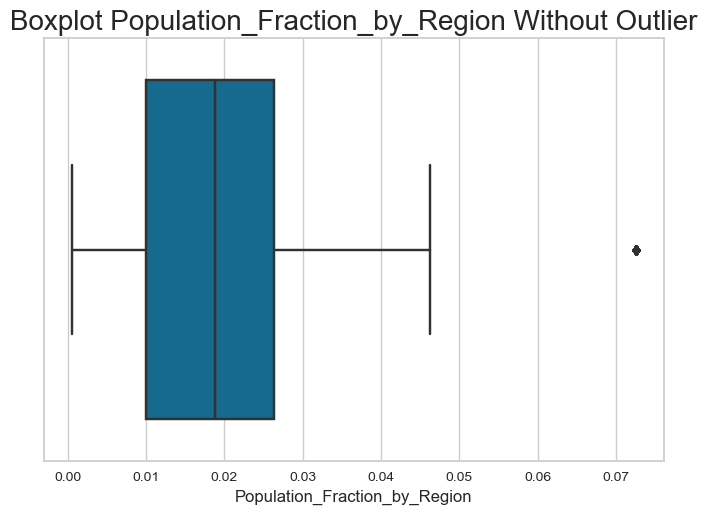

In [21]:
plt.title("Boxplot Population_Fraction_by_Region Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Population_Fraction_by_Region"])

<Axes: title={'center': 'Elderliness_in_Days'}, xlabel='Elderliness_in_Days'>

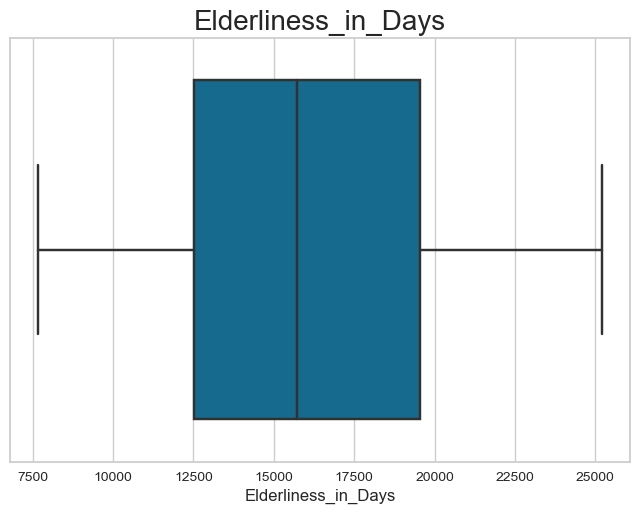

In [22]:
plt.title("Elderliness_in_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Elderliness_in_Days"])

<Axes: title={'center': 'Boxplot Work_Duration_in_Days'}, xlabel='Work_Duration_in_Days'>

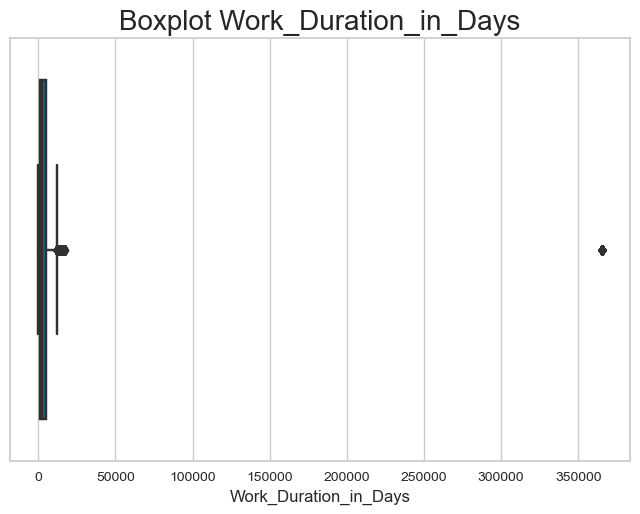

In [23]:
plt.title("Boxplot Work_Duration_in_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Work_Duration_in_Days"])

In [24]:
data = data[data['Work_Duration_in_Days'] < 100000]

<Axes: title={'center': 'Boxplot Work_Duration_in_Days Without Outlier'}, xlabel='Work_Duration_in_Days'>

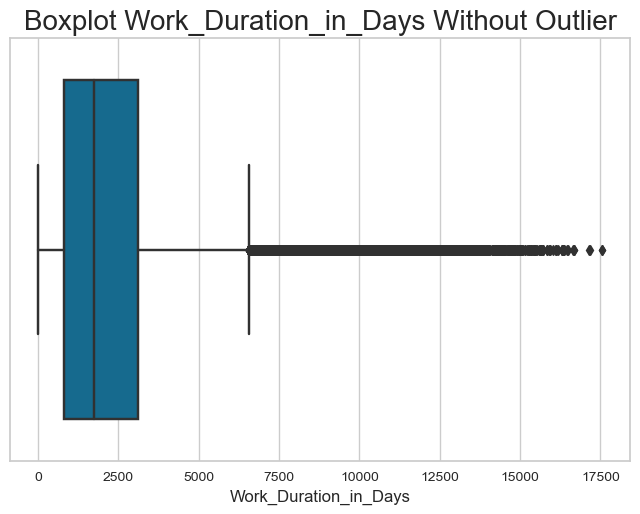

In [25]:
plt.title("Boxplot Work_Duration_in_Days Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Work_Duration_in_Days"])

<Axes: title={'center': 'Boxplot Enlistment_Period_in_Days'}, xlabel='Enlistment_Period_in_Days'>

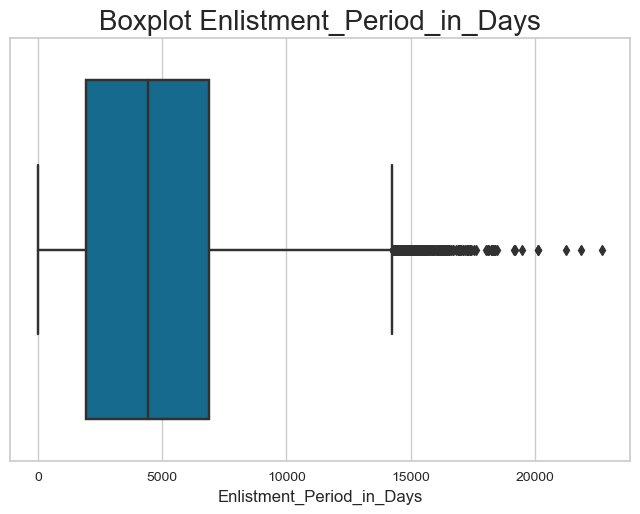

In [26]:
plt.title("Boxplot Enlistment_Period_in_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Enlistment_Period_in_Days"])

<Axes: title={'center': 'Identity_Age_in_Days'}, xlabel='Identity_Age_in_Days'>

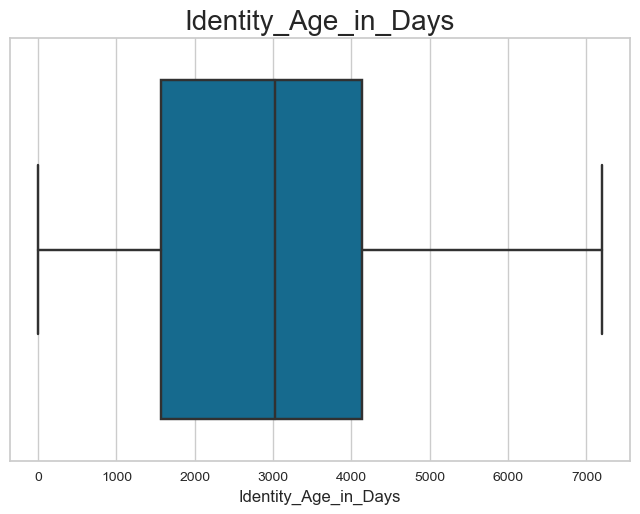

In [27]:
plt.title("Identity_Age_in_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Identity_Age_in_Days"])

<Axes: title={'center': 'Boxplot Rating_Origin_2'}, xlabel='Rating_Origin_2'>

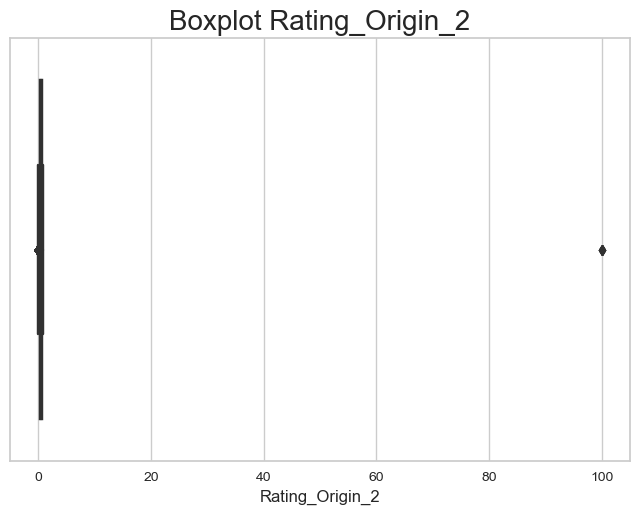

In [28]:
plt.title("Boxplot Rating_Origin_2", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Rating_Origin_2"])

In [29]:
data = data[data['Rating_Origin_2'] < 20]

<Axes: title={'center': 'Boxplot Rating_Origin_2 Without Outliers'}, xlabel='Rating_Origin_2'>

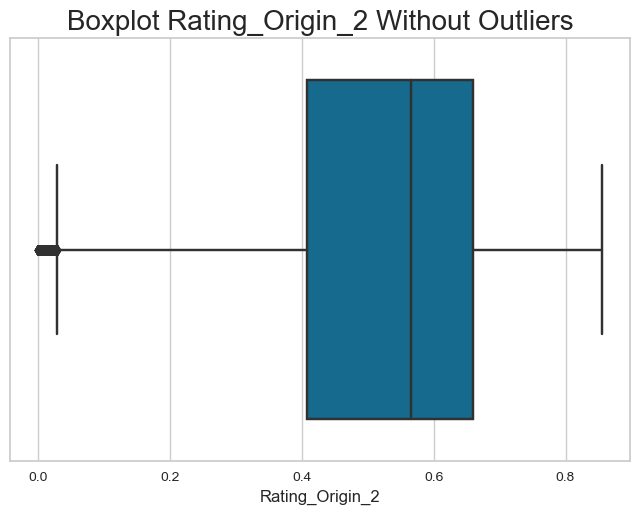

In [30]:
plt.title("Boxplot Rating_Origin_2 Without Outliers", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Rating_Origin_2"])

<Axes: title={'center': 'Boxplot Telecommunication_Switch'}, xlabel='Telecommunication_Switch'>

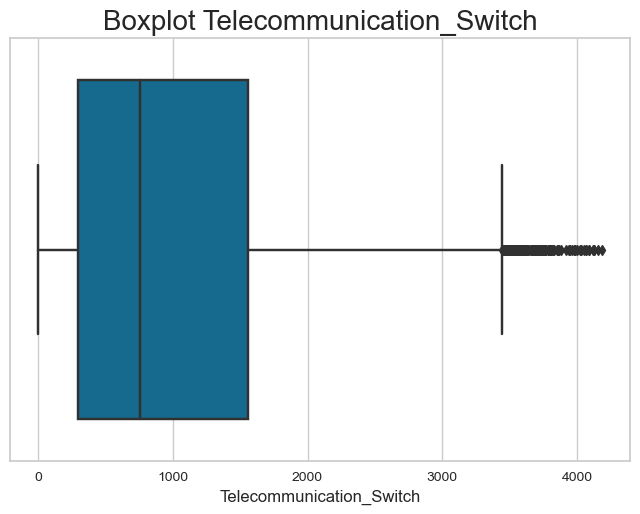

In [31]:
plt.title("Boxplot Telecommunication_Switch", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Telecommunication_Switch"])

<Axes: title={'center': 'Boxplot Solvency_Information_Agency'}, xlabel='Solvency_Information_Agency'>

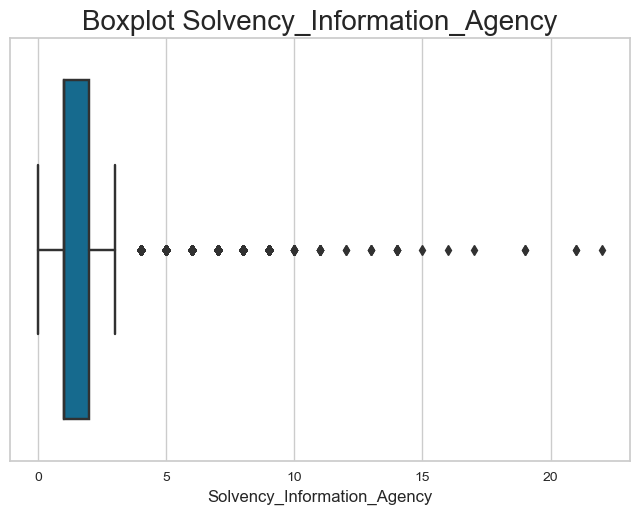

In [32]:
plt.title("Boxplot Solvency_Information_Agency", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Solvency_Information_Agency"])

<Axes: title={'center': 'Boxplot Offspring_Number'}, xlabel='Offspring_Number'>

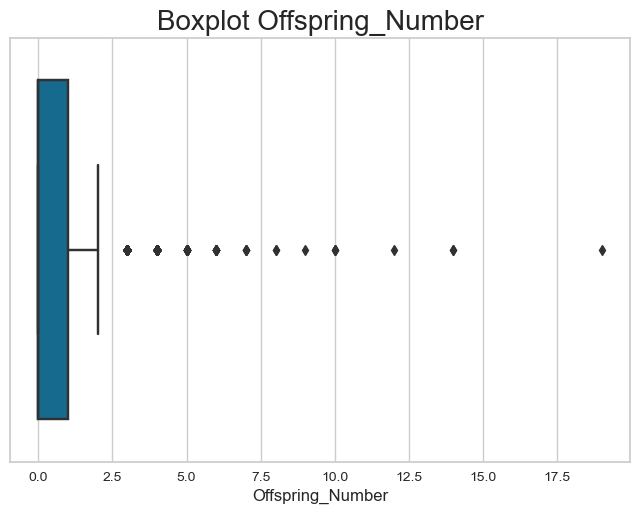

In [33]:
plt.title("Boxplot Offspring_Number", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Offspring_Number"])

In [34]:
data = data[data['Offspring_Number'] < 10]

<Axes: title={'center': 'Boxplot Offspring_Number Without Outlier'}, xlabel='Offspring_Number'>

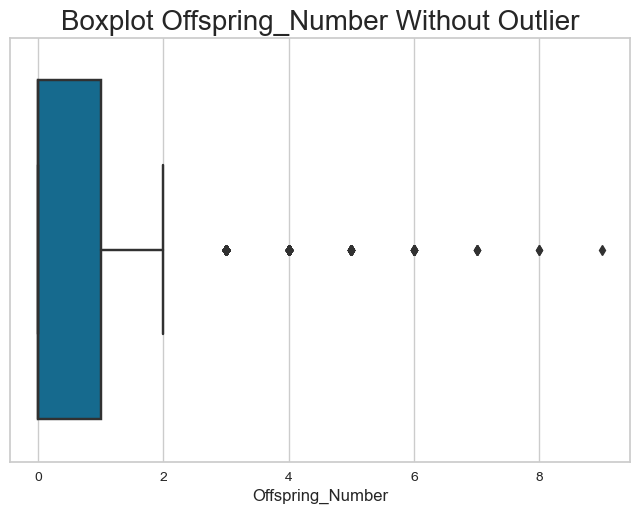

In [35]:
plt.title("Boxplot Offspring_Number Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data["Offspring_Number"])

<Axes: title={'center': 'Variable Patron_Sex'}, xlabel='Patron_Sex', ylabel='count'>

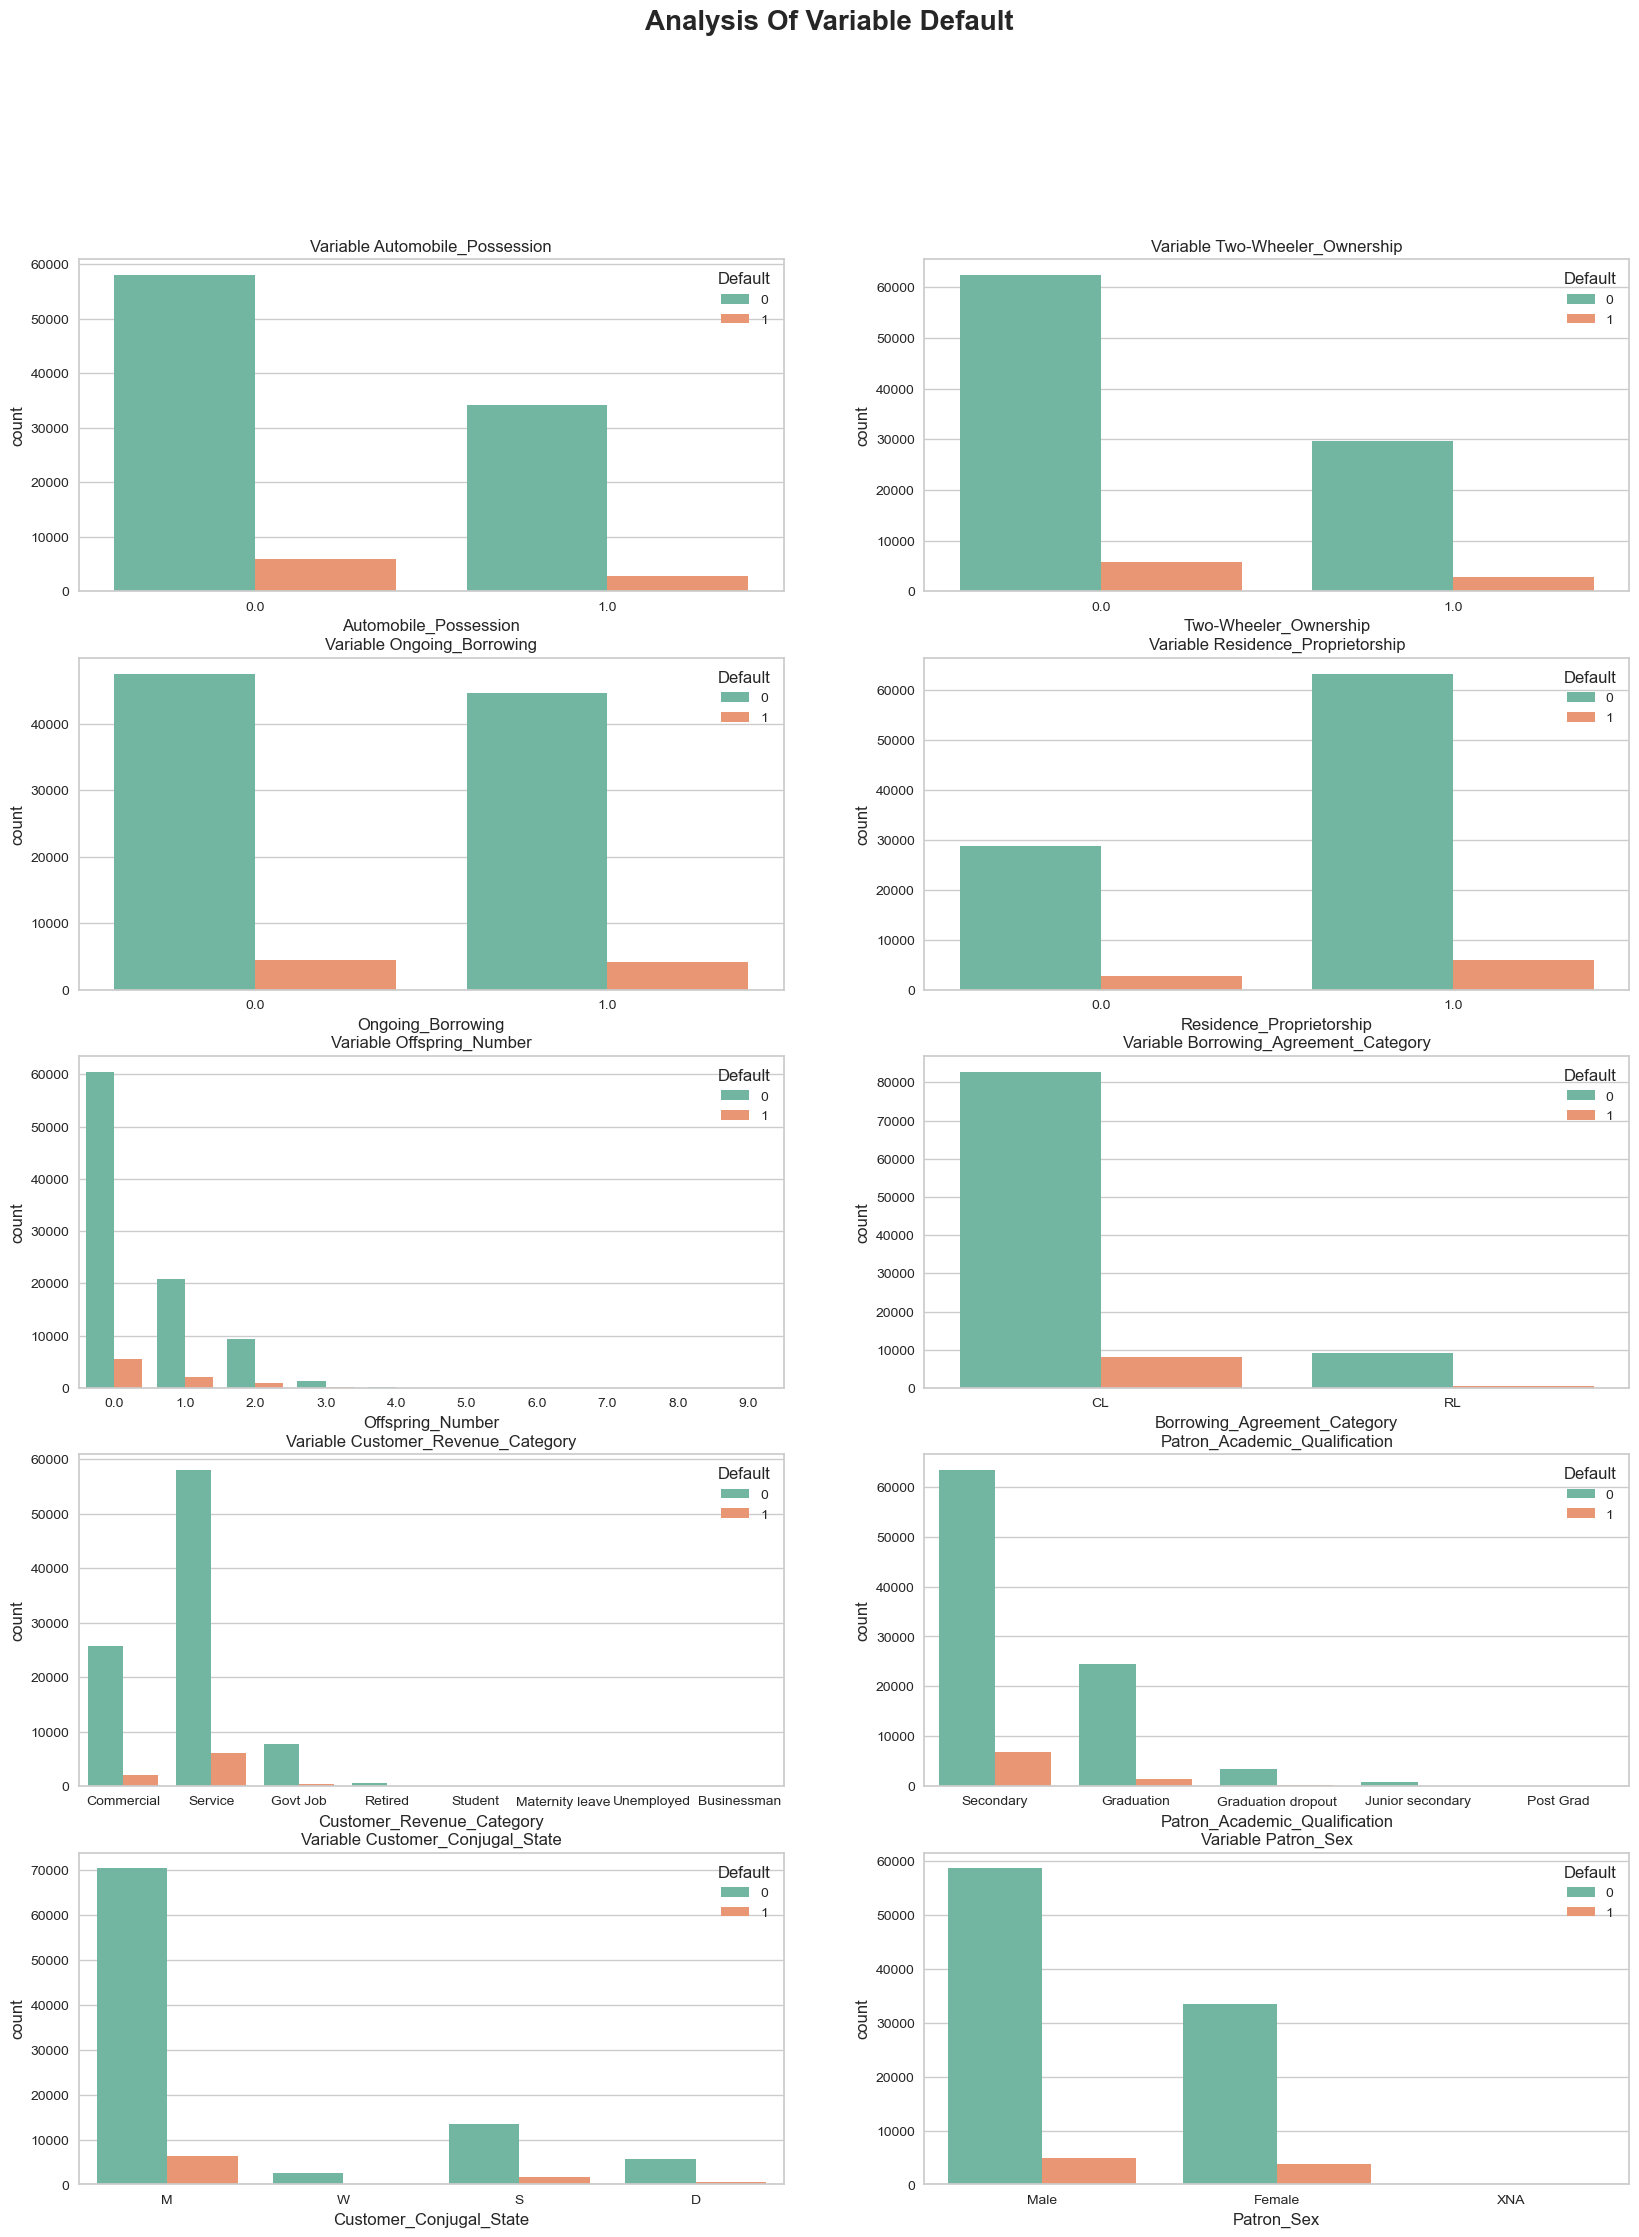

In [36]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Default",fontweight="bold", fontsize=20)

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Automobile_Possession')
sns.countplot(x = 'Automobile_Possession', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Two-Wheeler_Ownership')
sns.countplot(x = 'Two-Wheeler_Ownership', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Ongoing_Borrowing')
sns.countplot(x = 'Ongoing_Borrowing', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable Residence_Proprietorship')
sns.countplot(x = 'Residence_Proprietorship', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable Offspring_Number')
sns.countplot(x = 'Offspring_Number', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable Borrowing_Agreement_Category')
sns.countplot(x = 'Borrowing_Agreement_Category', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Customer_Revenue_Category')
sns.countplot(x = 'Customer_Revenue_Category', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 8)
plt.gca().set_title('Patron_Academic_Qualification')
sns.countplot(x = 'Patron_Academic_Qualification', hue = 'Default', palette = 'Set2', data = data)
            
plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Customer_Conjugal_State')
sns.countplot(x = 'Customer_Conjugal_State', hue = 'Default', palette = 'Set2', data = data)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Patron_Sex')
sns.countplot(x = 'Patron_Sex', hue = 'Default', palette = 'Set2', data = data)

# Model Building


In [37]:
data = data[data['Patron_Sex'] != 'XNA']
data = data[data['Cellphone_Marker'] == 1]

In [38]:
hot = pd.get_dummies(data[['Customer_Revenue_Category', 'Patron_Academic_Qualification', 'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category', 'Customer_Living_Arrangement', 'Patron_Constant_Correspondence_Marker', 'Customer_Professional_Communication_Marker', 'Sort_of_Institution']])

In [39]:
data = pd.concat([data, hot], axis = 1)
data = data.drop(['Customer_Revenue_Category', 'Patron_Academic_Qualification', 'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category', 'Customer_Living_Arrangement', 'Patron_Constant_Correspondence_Marker', 'Customer_Professional_Communication_Marker', 'Sort_of_Institution'], axis = 1)

In [40]:
data = data.drop('ID', axis = 1)

In [41]:
X = data.drop('Default', axis = 1)
X = X.values
y = data['Default']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [44]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [45]:
X_train.shape, y_train.shape

((128790, 112), (128790,))

In [46]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.7767140305924374
Mín Split:  4
Max Nvl:  11


0.7283648277459708

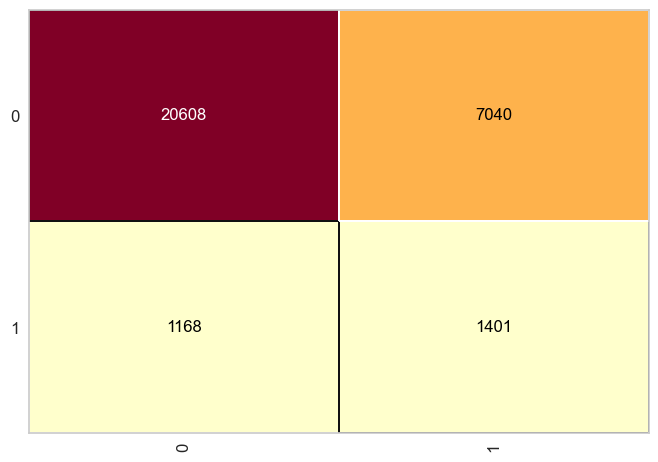

In [47]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)